# ***GSB544 Lab1***
# ***Joseph Lee***
# ***10/1/2023***

# **Task 1**

*Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.*

1.   x-axis is Income and y-axis is life expectancy
2.   The color of the bubbles represents the world region
3.   The size of the bubbles represents the population


*What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.*

I attempted to use a stacked bar plot, but this proved to be a difficult task, and not nearly as good as the bubble plot in making comparisons. I had to divide up the income into brackets so that the the bars would have meaning with 3 variables. The mean life expectancy was used for each region and then the bars were grouped in the colors of each region. Even after doing all this, the population variable is not accounted for. The bubble plot is definitely the better play is more appropriate in showing multiple variables.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


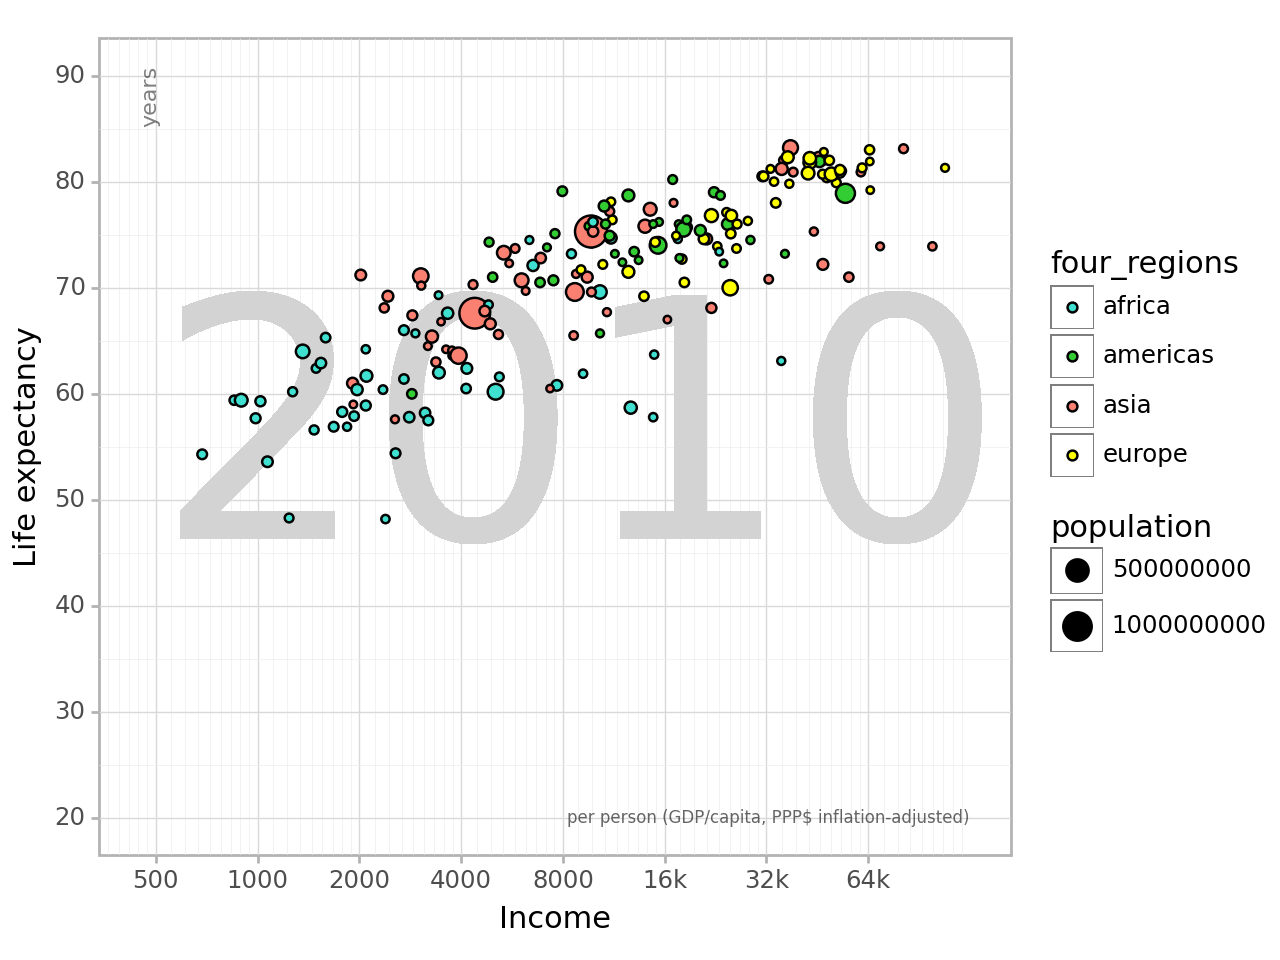

In [173]:
import pandas as pd
import plotnine as p9
from plotnine import ggplot, aes, geom_point, theme_light, labs, scale_x_log10, scale_y_continuous, geom_text, scale_fill_manual, annotate

# Loading and cleaning the data
df = pd.read_csv('/content/drive/My Drive/q1data.csv')
df = df[df['four_regions'].notna()]

# Manually setting the region colors
region_colors = {
    'asia': 'salmon',
    'africa': 'turquoise',
    'europe': 'yellow',
    'americas': 'limegreen'
}

# Labeling the breakpoints on the x-axis
breaks_values = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]
labels_values = ['500', '1000', '2000', '4000', '8000', '16k', '32k', '64k']

# Plotting
plot = (ggplot(df, aes(x='income', y='life_exp', fill='four_regions', size='population'))
        + geom_text(aes(x=9000, y=55), label="2010", size=120, va='center', ha='center', color="lightgray", fontweight="normal", alpha=0.9)
        + geom_point(shape='o')
        + theme_light()
        + labs(x="Income", y="Life expectancy")
        + scale_x_log10(breaks=breaks_values, labels=labels_values)
        + scale_y_continuous(limits=[20, 90], breaks=range(20, 91, 10))
        + scale_fill_manual(values=region_colors)
        + annotate("text", x=128000, y=20, label="per person (GDP/capita, PPP$ inflation-adjusted)", size=6, ha='right', alpha=0.6)
        + annotate("text", x=450, y=88, label="years", size=8, ha='left', alpha=0.5, angle=90)
       )

plot.draw()


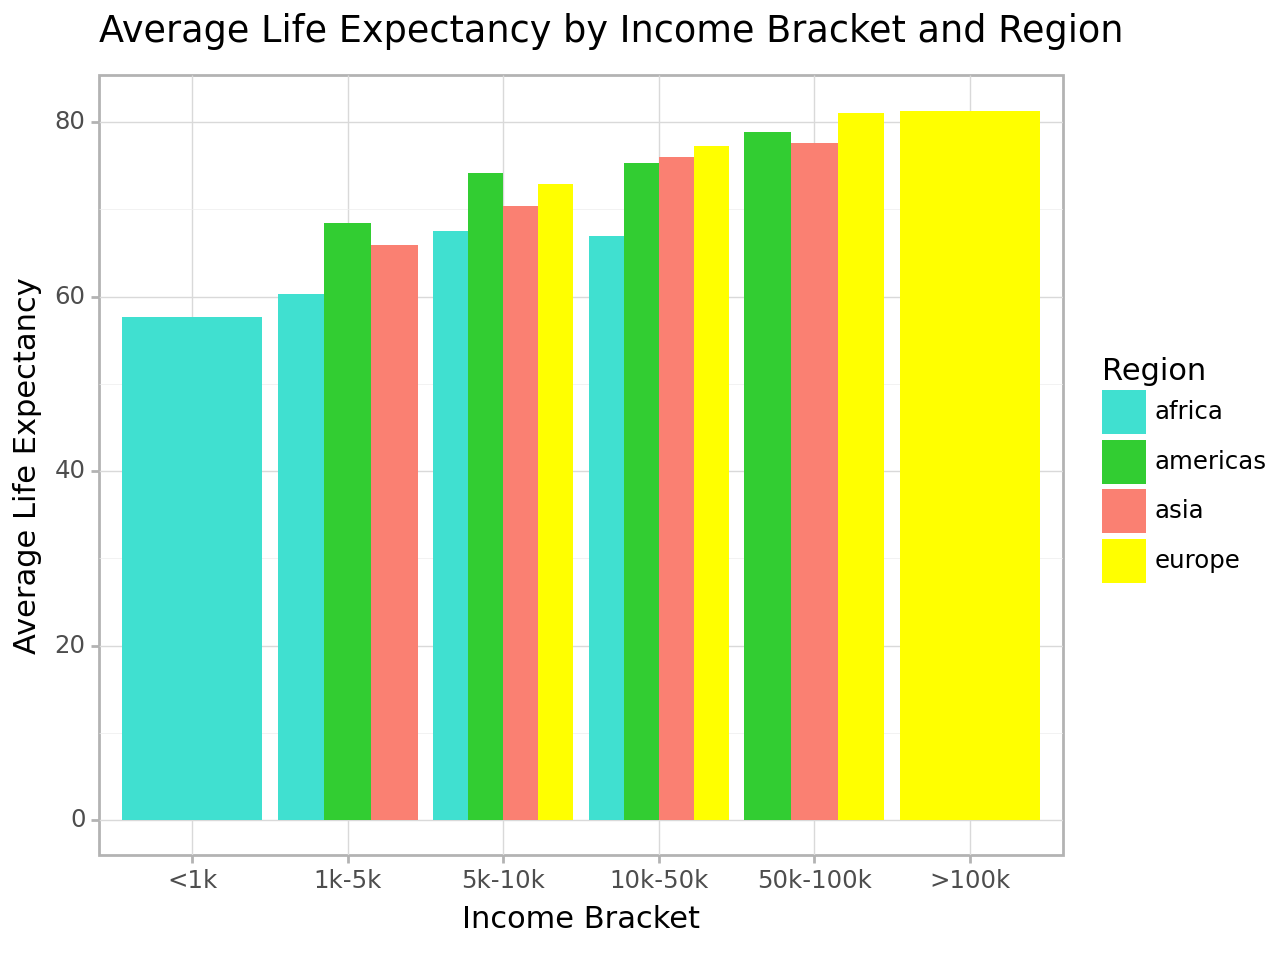

In [186]:
import pandas as pd
import numpy as np
import plotnine as p9
from plotnine import ggplot, aes, geom_bar, theme_light, labs, scale_fill_manual

# Loading and cleaning the data
df1 = pd.read_csv('/content/drive/My Drive/q1data.csv')
df1 = df1[df1['four_regions'].notna()]

# Binning the 'income' into categories
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000]
labels = ['<1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '>100k']
df1['income_bin'] = pd.cut(df1['income'], bins=bins, labels=labels, right=False)

# Manually setting the region colors
region_colors = {
    'asia': 'salmon',
    'africa': 'turquoise',
    'europe': 'yellow',
    'americas': 'limegreen'
}

# Grouped bar plot for 'income' and 'life_exp'
plot = (ggplot(df1, aes(x='income_bin', y='life_exp', fill='four_regions'))
        + geom_bar(stat='summary', fun_y=np.mean, position='dodge')
        + scale_fill_manual(values=region_colors)
        + theme_light()
        + labs(title="Average Life Expectancy by Income Bracket and Region", x="Income Bracket", y="Average Life Expectancy", fill="Region")
       )

plot.draw()


# **Task 2**

*Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.*

1.   x-axis represents % of GDP that are exports
2.   y-axis represents % of GDP that are imports
3.   the color of the bubble represents the region
4.   the size of the bubble represents the energy (consumption?)



*What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.*

I tried doing a ridge plot here and it provides a clear view of skewness, mode, min/max and other characteristics of distributions. It also has the advantage of getting rid of overplotting. A disadvantage is that individual data points are not shown, particularly outliers are not clearly visible in this type of plot. Also, the data needed to be merged into one column for this type of plot to show imports and exports side by side.



/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


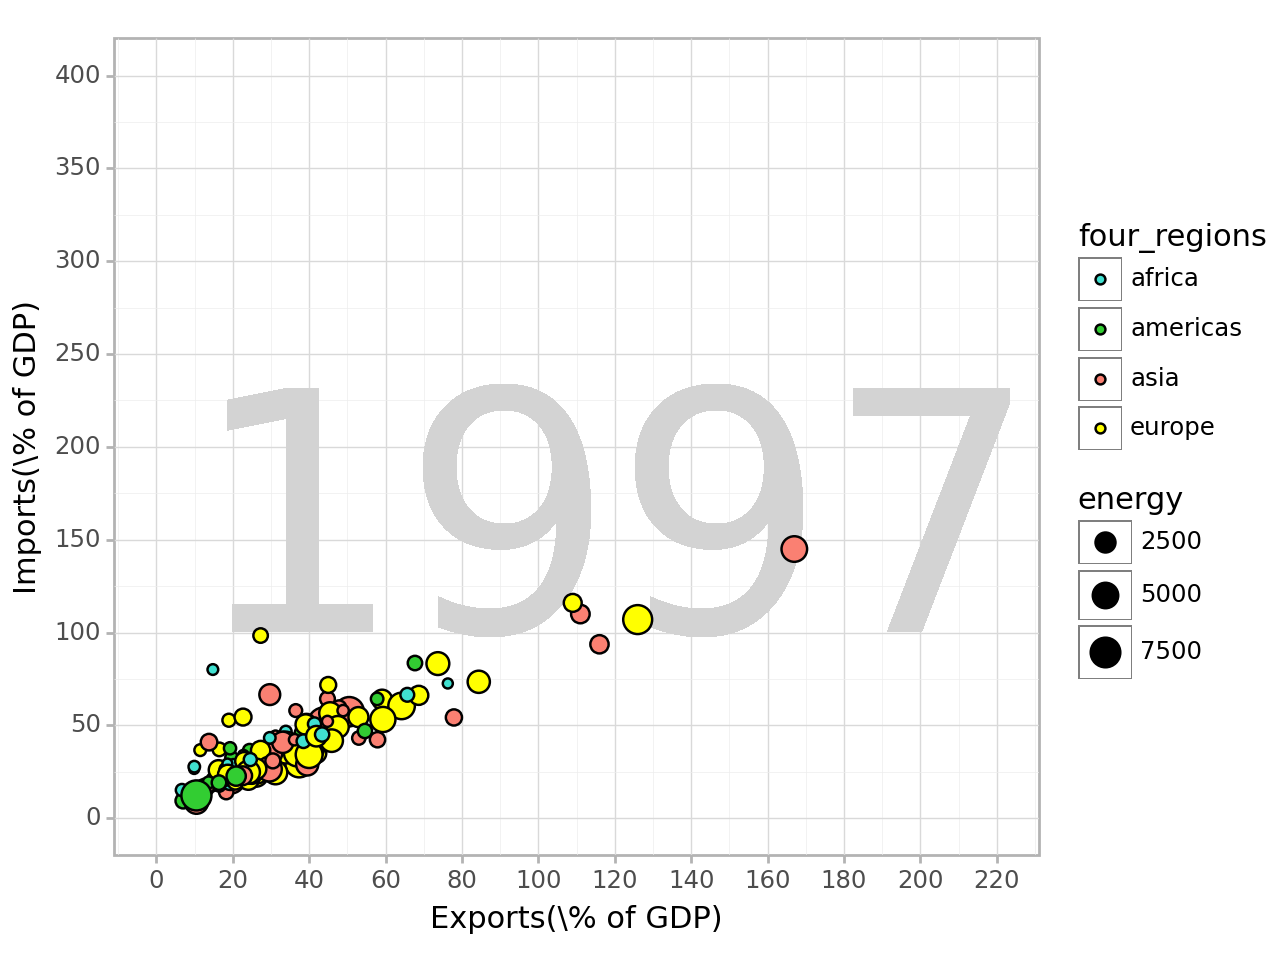

In [155]:
import pandas as pd
import plotnine as p9
from plotnine import ggplot, aes, geom_point, theme_light, labs, scale_x_continuous, scale_y_continuous, geom_text, scale_fill_manual

# Loading and cleaning the data
df2 = pd.read_csv('/content/drive/My Drive/q2data.csv')
df2 = df2[df2['four_regions'].notna()]
df2['energy'] = pd.to_numeric(df2['energy'], errors='coerce')
df2 = df2[df2['energy'].notna()]

# Manually setting the region colors
region_colors = {
    'asia': 'salmon',
    'africa': 'turquoise',
    'europe': 'yellow',
    'americas': 'limegreen'
}

# Plotting
plot = (ggplot(df2, aes(x='exports', y='imports', fill='four_regions', size='energy'))
        + geom_text(aes(x=120, y=150), label="1997", size=120, va='center', ha='center', color="lightgray", fontweight="normal", alpha=0.9)
        + geom_point(shape='o')
        + theme_light()
        + labs(x="Exports(\% of GDP)", y="Imports(\% of GDP)")
        + scale_x_continuous(limits=[0, 220], breaks=range(0, 221, 20))
        + scale_y_continuous(limits=[0, 400], breaks=range(0, 401, 50))
        + scale_fill_manual(values=region_colors)
       )

plot.draw()


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 6 rows containing non-finite values.


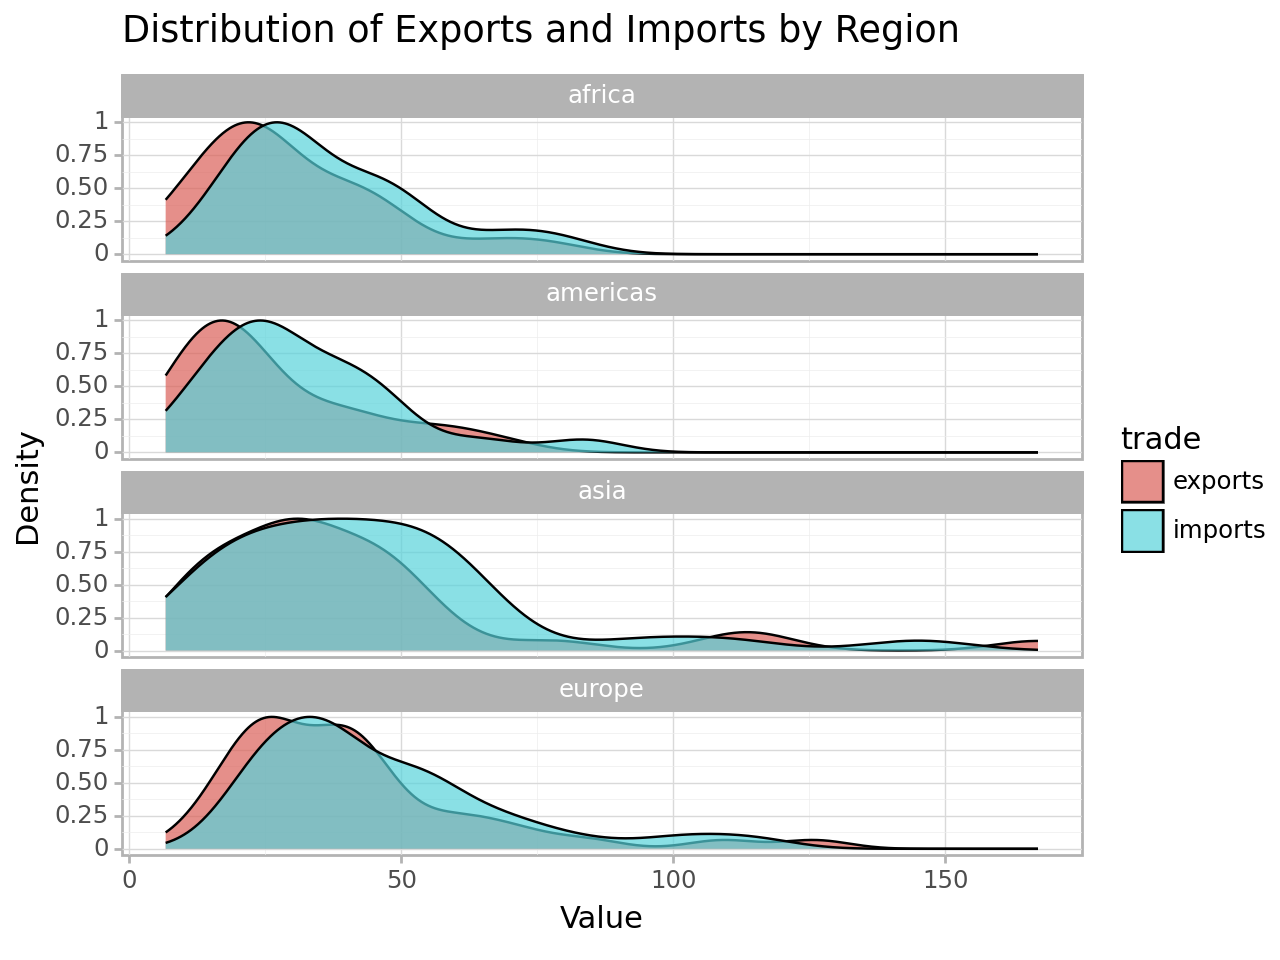

In [181]:
import pandas as pd
import plotnine as p9
from plotnine import ggplot, geom_density, facet_wrap, theme_light, labs

# Loading and cleaning the data
df3 = pd.read_csv('/content/drive/My Drive/q2data.csv')
df3 = df3[df3['four_regions'].notna()]
df3['energy'] = pd.to_numeric(df3['energy'], errors='coerce')
df3 = df3[df3['energy'].notna()]

# Merging the exports and imports columns
df3_merged = df3.melt(id_vars=['four_regions', 'energy'], value_vars=['exports', 'imports'], var_name='trade', value_name='value')

# Creating the ridge plot
plot = (ggplot(df3_merged, p9.aes(x='value', fill='trade'))
        + geom_density(p9.aes(y='..scaled..'), alpha=0.7)
        + facet_wrap('~ four_regions', ncol=1, scales='free_y')
        + theme_light()
        + labs(title="Distribution of Exports and Imports by Region", x="Value", y="Density")
       )

plot.draw()

# **Task 3**

*Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.*

1.   The x-axis is showing the % of population using the internet
2.   The y-axis is showing the GDP per capita
3.   The color of the bubbles are showing the regions
4.   The size of the bubbles are showing the income

*What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.*

I tried a faceted boxplot here with the four regions as the facets and using jitter to show the income. I'm not so sure this is an appropriate way to present this data in a meaningful way. Again, this is a nice way to see each region by themselves, but I'm not sure if I configured the plot in the correct manner, the jitter seems confusing, and when compared to the bubble plot, this is inferior.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


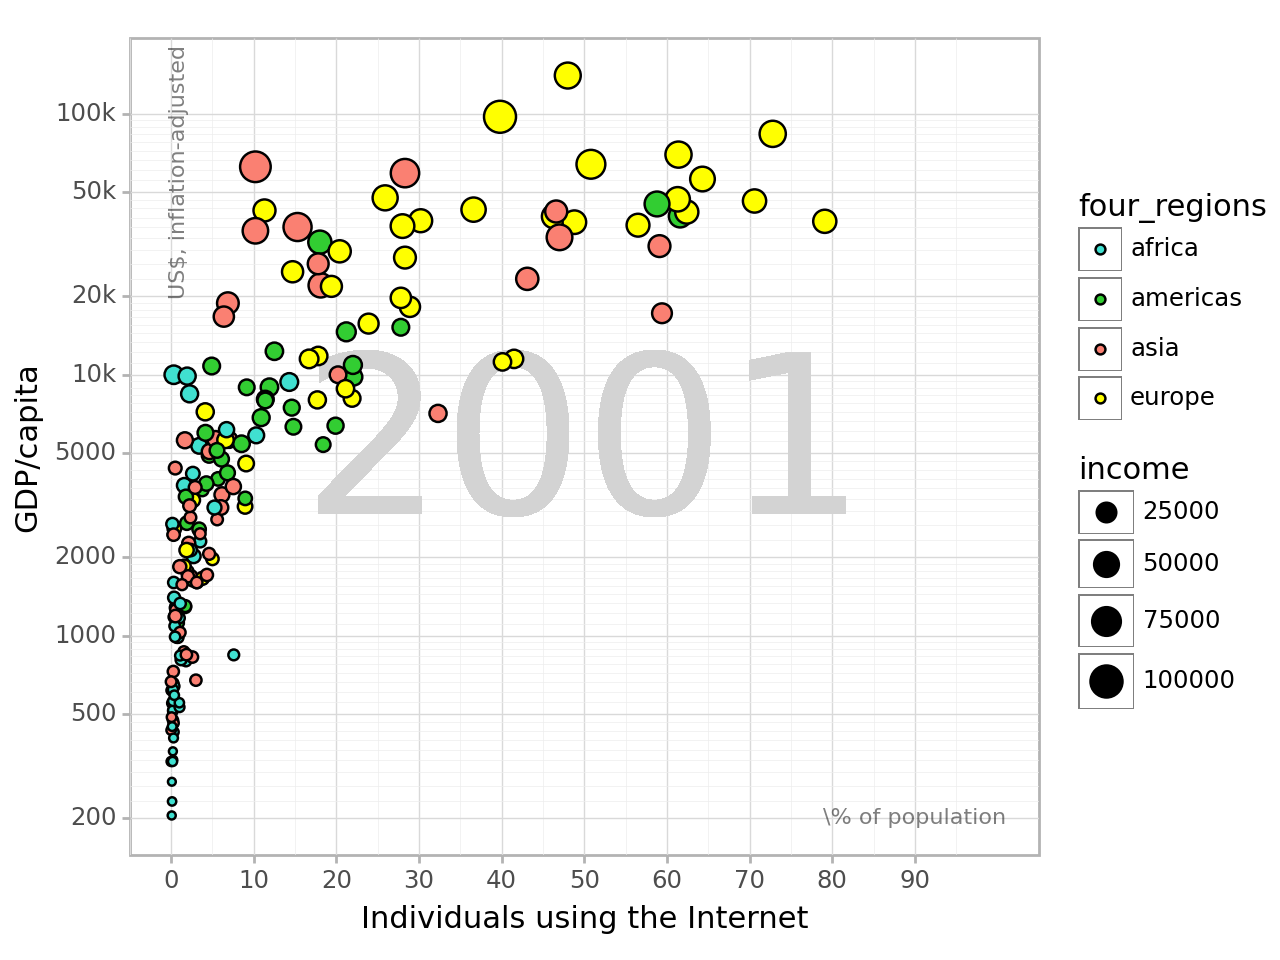

In [163]:
import pandas as pd
import plotnine as p9
from plotnine import ggplot, aes, geom_point, theme_light, labs, scale_x_continuous, scale_y_log10, geom_text, scale_fill_manual, annotate

# Loading and cleaning the data
df4 = pd.read_csv('/content/drive/My Drive/q3data.csv')
df4 = df4[df4['four_regions'].notna()]
df4['income'] = pd.to_numeric(df4['income'], errors='coerce')
df4 = df4[df4['income'].notna()]

# Manually setting the region colors
region_colors = {
    'asia': 'salmon',
    'africa': 'turquoise',
    'europe': 'yellow',
    'americas': 'limegreen'
}

# Labeling the breakpoints on the x-axis
breaks_values = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
labels_values = ['200', '500', '1000', '2000', '5000', '10k', '20k', '50k', '100k']

# Plotting
plot = (ggplot(df4, aes(x='internet_users', y='gdp', fill='four_regions', size='income'))
        + geom_text(aes(x=50, y=5000), label="2001", size=80, va='center', ha='center', color="lightgray", fontweight="normal", alpha=0.9)
        + geom_point(shape='o')
        + theme_light()
        + labs(x="Individuals using the Internet", y="GDP/capita")
        + scale_x_continuous(limits=[0, 100], breaks=range(0, 91, 10))
        + scale_y_log10(breaks=breaks_values, labels=labels_values)
        + scale_fill_manual(values=region_colors)
        + annotate("text", x=1, y=60000, label="US$, inflation-adjusted", size=8, alpha=0.5, angle=90)
        + annotate("text", x=90, y=200, label="\% of population", size=8, alpha=0.5)
       )

plot.draw()


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 11 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 11 rows containing missing values.


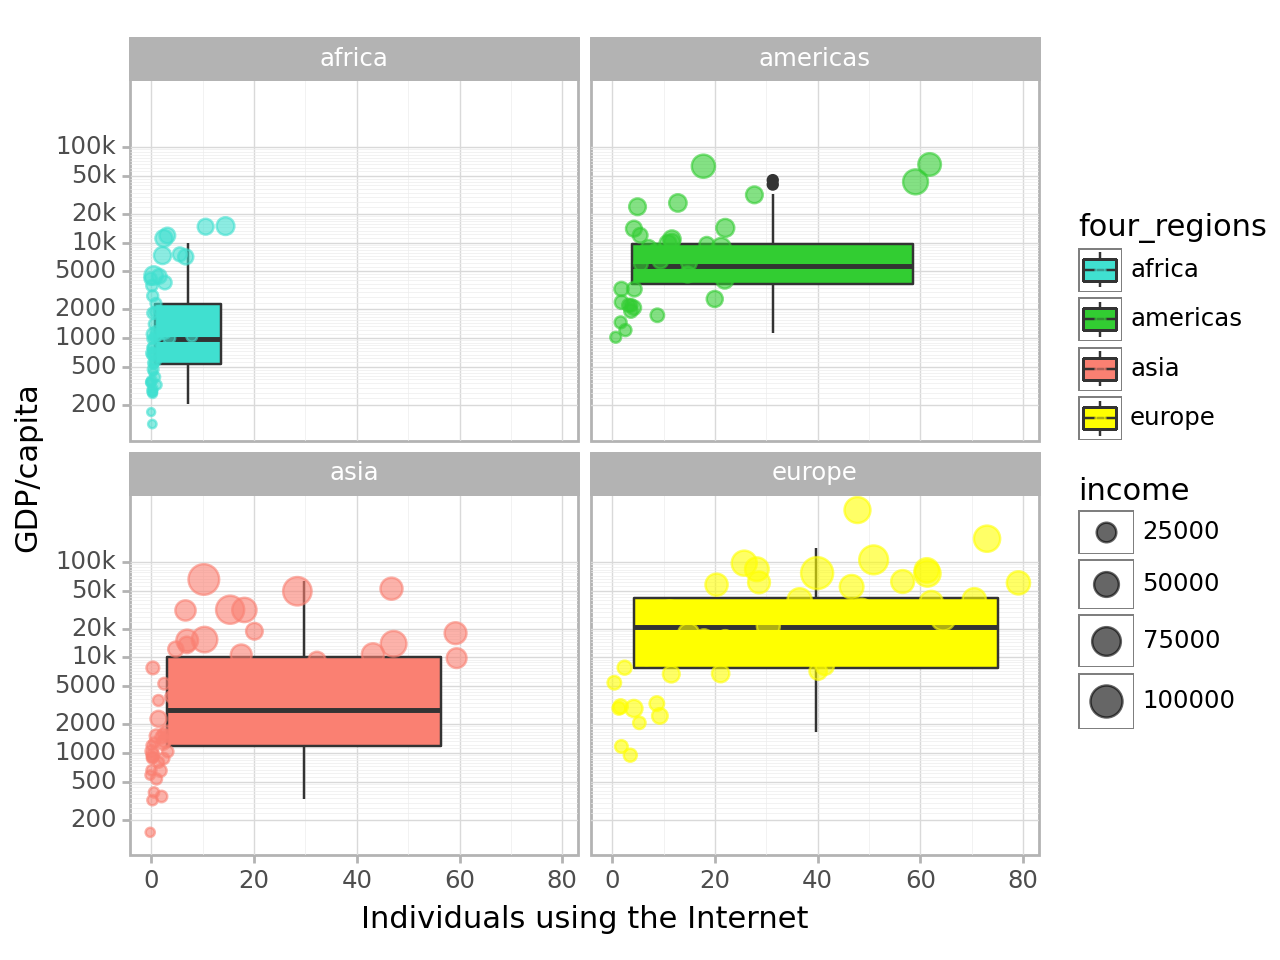

In [168]:
import pandas as pd
import plotnine as p9
from plotnine import ggplot, aes, geom_boxplot, geom_jitter, facet_wrap, theme_light, labs, scale_y_log10, scale_fill_manual

# Loading and cleaning the data
df4 = pd.read_csv('/content/drive/My Drive/q3data.csv')
df4 = df4[df4['four_regions'].notna()]
df4['income'] = pd.to_numeric(df4['income'], errors='coerce')
df4 = df4[df4['income'].notna()]

# Manually setting the region colors
region_colors = {
    'asia': 'salmon',
    'africa': 'turquoise',
    'europe': 'yellow',
    'americas': 'limegreen'
}

# Labeling the breakpoints on the y-axis
breaks_values = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
labels_values = ['200', '500', '1000', '2000', '5000', '10k', '20k', '50k', '100k']

# Plotting
plot = (ggplot(df4, aes(x='internet_users', y='gdp'))
        + geom_boxplot(aes(fill='four_regions'))
        + geom_jitter(aes(color='four_regions', size='income'), width=0.3, alpha=0.6)
        + facet_wrap('~ four_regions')
        + theme_light()
        + labs(x="Individuals using the Internet", y="GDP/capita")
        + scale_y_log10(breaks=breaks_values, labels=labels_values)
        + scale_fill_manual(values=region_colors)
        + scale_color_manual(values=region_colors)
       )

plot.draw()
